In [1]:
%matplotlib widget
import matplotlib.pyplot as plt

import numpy as np
import irfuplanets.time
import irfuplanets.maven.lpw

Read /Users/dave/irfuplanets.cfg
Leapsecond file is 3 days old
Setting up SDC access (public)
Read information for 19707 orbits
MAVEN setup complete
----


1092
Query lpw/l2/2015/04/mvn_lpw_l2_lpnt_*_v*_r*.cdf: Returning 1 (DL: 0, DEL: 0)


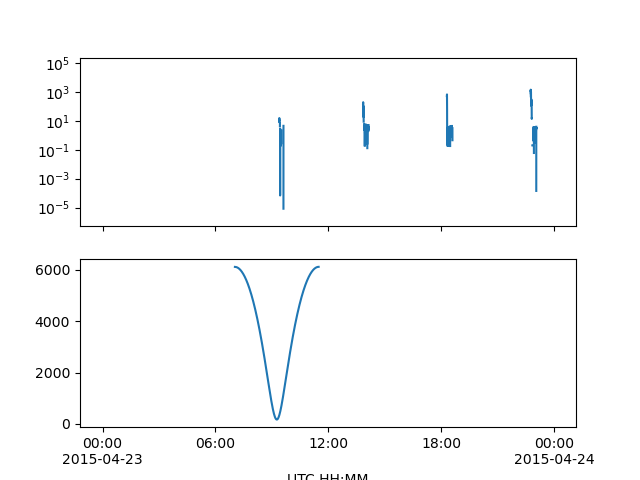

In [2]:
t = irfuplanets.time.spiceet("2015-04-23T06:00")
o = irfuplanets.maven.orbits[t + 3600.*5]
print(o.number)
tt = np.arange(o.start, o.finish, 30.)
lpw_nt = irfuplanets.maven.lpw.lpw_l2_load(o.start, o.finish)
pos = irfuplanets.maven.iau_pgr_alt_lat_lon_position(tt)

fig, axs = plt.subplots(2,1,sharex=True)

plt.sca(axs[0])
plt.plot(lpw_nt['time'], lpw_nt['ne'], label='ne')
plt.yscale('log')

plt.sca(axs[1])
plt.plot(tt, pos[0], label='alt')

irfuplanets.time.setup_time_axis()
plt.show()

Query lpw/l2/2015/04/mvn_lpw_l2_wspecact_*_v*_r*.cdf: Returning 1 (DL: 0, DEL: 0)
/Users/dave/data/maven/lpw/l2/2015/04/mvn_lpw_l2_wspecact_20150423_v02_r01.cdf
Query lpw/l2/2015/04/mvn_lpw_l2_wn_*_v*_r*.cdf: Returning 1 (DL: 0, DEL: 0)
/Users/dave/data/maven/lpw/l2/2015/04/mvn_lpw_l2_wn_20150423_v02_r03.cdf
Query lpw/l2/2015/04/mvn_lpw_l2_lpnt_*_v*_r*.cdf: Returning 1 (DL: 0, DEL: 0)


/Users/dave/code_projects/irfuplanets/irfuplanets/maven/lpw.py:275: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  img_obj = plt.pcolormesh(
/var/folders/d9/nm97yjpn7131p9jd_klj2_x80000gp/T/ipykernel_92433/1850886882.py:47: RuntimeWarning: divide by zero encountered in divide
  plt.plot(o3["time"], 0.069 * np.sqrt(o3["te"] / 11604.0 / o3["ne"]), "k.")
/var/folders/d9/nm97yjpn7131p9jd_klj2_x80000gp/T/ipykernel_92433/1850886882.py:61: RuntimeWarning: divide by zero encountered in divide
  0.069 * np.sqrt(o3["te"] / 11604.0 / o3["ne"]),


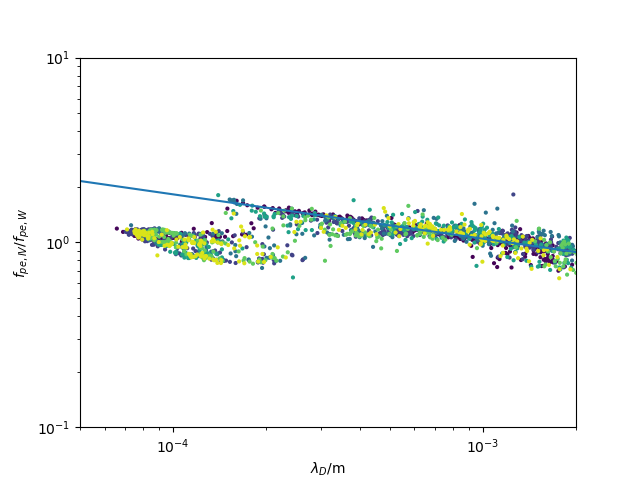

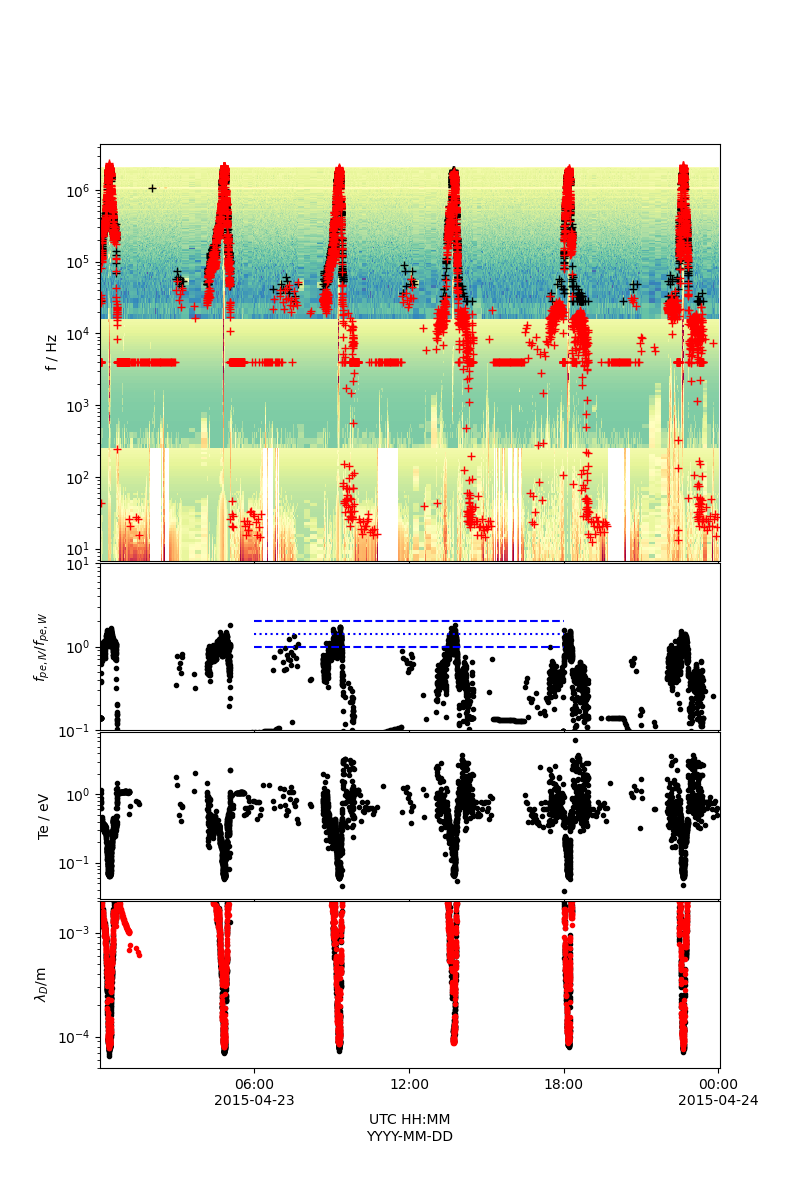

In [3]:
start = irfuplanets.time.spiceet("2015-04-23T06:00")
finish = start + 86400.0 / 2.0

# finish = start + 86400. * 2. - 1.

xl = np.array((start, finish))
xo = np.array((1, 1))

o = irfuplanets.maven.lpw.lpw_l2_load(kind="wspecact", start=start, finish=finish)
o2 = irfuplanets.maven.lpw.lpw_l2_load(kind="wn", start=start, finish=finish)
o3 = irfuplanets.maven.lpw.lpw_l2_load(kind="lpnt", start=start, finish=finish)

inx = np.isfinite(o2["ne"])
ne_w = np.interp(o3["time"], o2["time"][inx], o2["ne"][inx])

fig, axs = plt.subplots(
    4,
    1,
    sharex=True,
    figsize=(8, 12),
    gridspec_kw=dict(height_ratios=(5, 2, 2, 2)),
)

plt.subplots_adjust(hspace=0.01)
plt.sca(axs[0])
irfuplanets.maven.lpw.lpw_plot_spec(o, colorbar=False, full_resolution=True, fmin=2e4)
# plt.ylim(1e4, 2e6)
plt.plot(o2["time"], 8980 * np.sqrt(o2["ne"]), "k+")
plt.plot(o3["time"], 8980 * np.sqrt(o3["ne"]), "r+")
# plt.plot(o3['time'], 8980*np.sqrt(ne_w), 'b*')

plt.sca(axs[1])
plt.plot(o3["time"], np.sqrt(o3["ne"] / ne_w), "k.")
plt.plot(xl, xo * 1.0, "b--")
plt.plot(xl, xo * 2.0, "b--")
plt.plot(xl, xo * np.sqrt(2), "b:")
plt.yscale("log")
plt.ylim(0.1, 10.0)
plt.ylabel(r"$f_{pe,IV} / f_{pe,W}$")

plt.sca(axs[2])
plt.plot(o3["time"], o3["te"] / 11604.0, "k.")
plt.yscale("log")
plt.ylabel("Te / eV")

plt.sca(axs[3])
plt.plot(o3["time"], 0.069 * np.sqrt(o3["te"] / 11604.0 / o3["ne"]), "k.")
plt.plot(o3["time"], 0.069 * np.sqrt(o3["te"] / 11604.0 / ne_w), "r.")

plt.plot(xl, xo * 0.0063 / 2.0, "b--")
plt.plot(xl, xo * 0.05 / 2.0, "b:")
plt.plot(xl, xo * 0.4 / 2.0, "b--")
plt.ylim(5e-5, 2e-3)
plt.yscale("log")
plt.ylabel(r"$\lambda_D$/m")

irfuplanets.time.setup_time_axis()

plt.figure()
plt.scatter(
    0.069 * np.sqrt(o3["te"] / 11604.0 / o3["ne"]),
    np.sqrt(o3["ne"] / ne_w),
    c=o3["time"],
    marker=".",
    edgecolor="none",
)
plt.ylabel(r"$f_{pe,IV} / f_{pe,W}$")
plt.xlabel(r"$\lambda_D$/m")
plt.xscale("log")
plt.yscale("log")
plt.xlim(5e-5, 2e-3)
plt.ylim(0.1, 10.0)
x = np.array((5e-5, 2e-3))
plt.plot(x, 10.0 ** (-0.24 * np.log10(x) - 0.7))

plt.show()


Query swe/l2/2015/04/mvn_swe_l2_svyspec_*_v*_r*.cdf: Returning 1 (DL: 0, DEL: 0)
Query swi/l2/2015/04/mvn_swi_l2_onboardsvyspec_*_v*_r*.cdf: Returning 1 (DL: 0, DEL: 0)


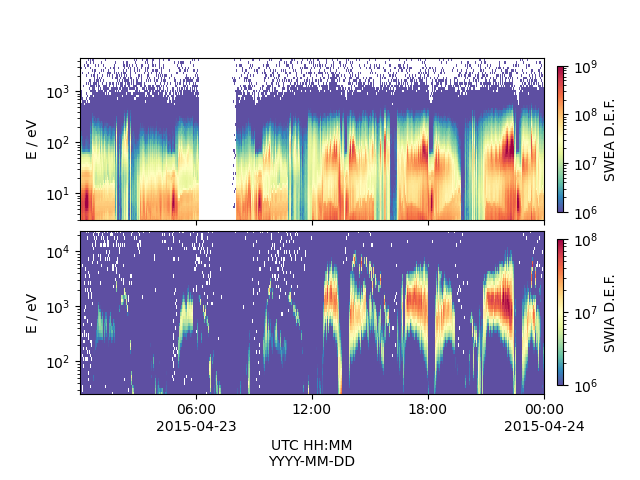

In [6]:
import irfuplanets.maven.swia
import irfuplanets.maven.swea

fig, axs = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(right=0.85, hspace=0.07, bottom=0.18)
plt.sca(axs[0])
d = irfuplanets.maven.swea.load_swea_l2_summary(start, finish)
irfuplanets.maven.swea.plot_swea_l2_summary(d)

plt.sca(axs[1])
d = irfuplanets.maven.swia.load_swia_l2_summary(start, finish, kind="onboardsvyspec")
irfuplanets.maven.swia.plot_swia_l2_summary(d)
irfuplanets.time.setup_time_axis(calendar=True)
plt.show()